In [1]:
! pip install diffusers==0.14.0 xformers transformers scipy ftfy accelerate controlnet_aux

  Using cached diffusers-0.14.0-py3-none-any.whl (737 kB)
  Using cached xformers-0.0.20.tar.gz (7.6 MB)
  Preparing metadata (setup.py) ... done
  Using cached transformers-4.30.2-py3-none-any.whl (7.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 1.8 MB/s eta 0:00:0000:0100:01
  Using cached ftfy-6.1.1-py3-none-any.whl (53 kB)
  Using cached accelerate-0.20.3-py3-none-any.whl (227 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.9/261.9 kB 6.2 MB/s eta 0:00:00a 0:00:01
  Using cached pyre_extensions-0.0.29-py3-none-any.whl (12 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
  Using cached tokenizers-0.13.3-cp311-cp311-macosx_10_11_universal2.whl (4.0 MB)
  Using cached safetensors-0.3.1-cp311-cp311-macosx_10_11_universal2.whl (400 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.2 MB/s eta 0:00:00
  Using cached opencv_python-4.7.0.72-cp37-abi3-macosx_10_16_x86_64.whl (53.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/1

In [5]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 2.5 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.5/243.5 kB 5.3 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.2 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.2 MB/s eta 0:00:00
  Using cached pyparsing-3.1.0-py3-none-any.whl (102 kB)


In [2]:
from diffusers import StableDiffusionInpaintPipeline, ControlNetModel, UniPCMultistepScheduler
from pipeline_stable_diffusion_controlnet_inpaint import *
from diffusers.utils import load_image

import cv2
from PIL import Image
import numpy as np
import torch
from matplotlib import pyplot as plt

/Users/kevinbuhler/opt/anaconda3/envs/blur/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
controlnet = ControlNetModel.from_pretrained(
    "fusing/stable-diffusion-v1-5-controlnet-seg"
)
pipe = StableDiffusionControlNetInpaintPipeline.from_pretrained(
     "runwayml/stable-diffusion-inpainting", controlnet=controlnet
 )

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)

# Remove if you do not have xformers installed
# see https://huggingface.co/docs/diffusers/v0.13.0/en/optimization/xformers#installing-xformers
# for installation instructions
# pipe.enable_xformers_memory_efficient_attention()

text_encoder/model.safetensors not found
Fetching 16 files: 100%|██████████| 16/16 [00:00<00:00, 100612.99it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [10]:
house_real_image=load_image("https://huggingface.co/lllyasviel/sd-controlnet-seg/resolve/main/images/house.png")
seg_image=load_image("https://huggingface.co/lllyasviel/sd-controlnet-seg/resolve/main/images/house_seg.png")

house_mask=np.zeros((*seg_image.size,3),dtype='uint8')
house_mask[50:400,-350:,:]=255
house_mask=Image.fromarray(house_mask)

100%|██████████| 20/20 [20:30<00:00, 61.55s/it]
[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


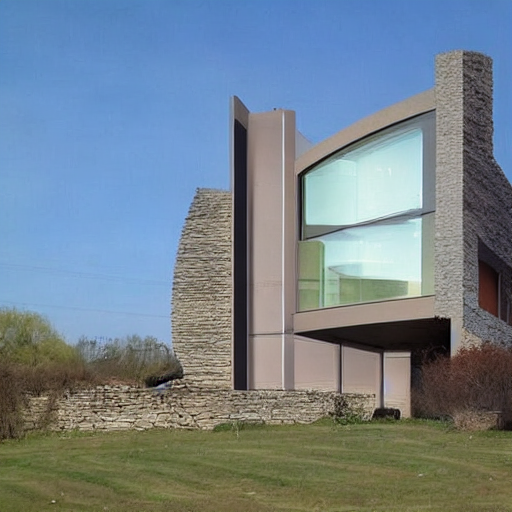

In [11]:
# pipe.to('mps')

# generate image
generator = torch.manual_seed(0)
new_image = pipe(
    "a sleek futuristic house",
    num_inference_steps=20,
    generator=generator,
    image=house_real_image,
    control_image=seg_image,
    mask_image=house_mask
).images[0]

new_image